## Урок 7

In [48]:
import math
import numpy as np
import matplotlib.pyplot as plt

### 1.
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

### Решение

Коэффицинты (с intercept): a = 444.1773573243596, b = 2.620538882402765
Коэффицинт (без intercept): b = 5.889820420132689


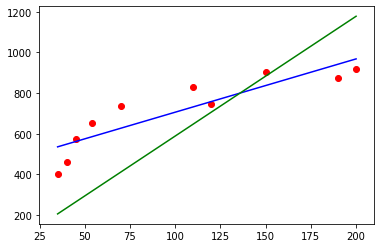

In [49]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = zp.size

b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
a1 = np.mean(ks) - b1 * np.mean(zp)
print(f"Коэффицинты (с intercept): a = {a1}, b = {b1}")

X = zp.reshape((n, 1))
Y = ks.reshape((n, 1))
b2 = (np.linalg.inv(X.T @ X) @ X.T @ Y)[0][0]
print(f"Коэффицинт (без intercept): b = {b2}")

x = np.array(sorted(zp))
y1 = a1 + x * b1
y2 = x * b2
plt.plot(x, y1, c='blue')
plt.plot(x, y2, c='green')
plt.scatter(zp, ks, c='red')
plt.show()

### 2.
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

### Решение

In [50]:
alpha = 1e-6
B1 = 0.1
X = zp
y = ks

def mse_(B1, y=y, X=X, n=n):
    return np.sum((B1 * X - y)**2) / n

for i in range(1000):
    B1 -= alpha * (2 / n) * np.sum((B1 * X - y) * X)
    if i % 100 == 0:
        print(f'Iteration: {i}, B1 = {B1}, mse = {mse_(B1)}')
        
print(f'Коэффициент линейной регрессии = {B1}')

Iteration: 0, B1 = 0.25952808, mse = 493237.7212546963
Iteration: 100, B1 = 5.54537842245223, mse = 58151.31823171113
Iteration: 200, B1 = 5.868748638669329, mse = 56522.97550129376
Iteration: 300, B1 = 5.888531320728348, mse = 56516.88130936019
Iteration: 400, B1 = 5.8897415574471985, mse = 56516.85850140053
Iteration: 500, B1 = 5.889815595583751, mse = 56516.858416040064
Iteration: 600, B1 = 5.889820124983314, mse = 56516.85841572062
Iteration: 700, B1 = 5.889820402076462, mse = 56516.85841571941
Iteration: 800, B1 = 5.88982041902807, mse = 56516.8584157194
Iteration: 900, B1 = 5.889820420065112, mse = 56516.85841571941
Коэффициент линейной регрессии = 5.889820420128437


### 3.
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

### Решение

Если известно среднеквадратическое отклонение генеральной совокупности, то используется таблица значений функции Лапласа,
если не известно, то таблица критических точек распределения Стьюдента.

### *4.
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

### Решение

In [51]:
alpha = 1e-5
B1 = 0.1
A1 = 0.1
X = zp
y = ks

def mse2_(A1, B1, y=y, X=X, n=n):
    return np.sum((A1 + B1 * X - y)**2) / n

for i in range(2000000):
    y0 = A1 + B1 * X
    A1 -= alpha * (2 / n) * np.sum(y0 - y)
    B1 -= alpha * (2 / n) * np.sum((y0 - y) * X)
    if i % 100000 == 0:
        print(f'Iteration: {i}, A1 = {A1}, B1 = {B1}, mse = {mse2_(A1, B1)}')
        
print(f'Коэффициенты: {A1}, {B1}')

Iteration: 0, A1 = 0.1139932, B1 = 1.6950780000000003, mse = 298805.38996099564
Iteration: 100000, A1 = 176.8178756872003, B1 = 4.588422873669245, mse = 24602.65909964911
Iteration: 200000, A1 = 283.1956881772298, B1 = 3.805435141410038, mse = 13044.16516084747
Iteration: 300000, A1 = 347.24756959921285, B1 = 3.333984975180734, mse = 8853.693377127487
Iteration: 400000, A1 = 385.81429152799836, B1 = 3.0501168504576253, mse = 7334.45965488598
Iteration: 500000, A1 = 409.0359675710964, B1 = 2.8791950478876815, mse = 6783.669380682817
Iteration: 600000, A1 = 423.0181317603773, B1 = 2.77628013758468, mse = 6583.983235150707
Iteration: 700000, A1 = 431.43702947702633, B1 = 2.7143133281816474, mse = 6511.588063004361
Iteration: 800000, A1 = 436.50619028818244, B1 = 2.677002063406801, mse = 6485.341570358934
Iteration: 900000, A1 = 439.55841781180436, B1 = 2.6545363193656377, mse = 6475.8260411356305
Iteration: 1000000, A1 = 441.396215664944, B1 = 2.6410093146294247, mse = 6472.376235570253
I